<a href="https://colab.research.google.com/github/dharma610/Project/blob/master/part_2_Xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
from scipy.integrate import odeint
import numpy as np
import pandas as pd
from random import sample
import matplotlib.pyplot as plt
%matplotlib inline 
!pip install mpld3
import mpld3
mpld3.enable_notebook()

In [56]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [57]:
def plotsir(t, S, I, R):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
  ax.set_xlabel('Time (days)')
  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();

In [58]:
""" gamma is a list of 1000 random number in (0,1) """

import random
gamma = []
for i in range(1000):
    gamma.append(random.uniform(0, 1))
    


In [59]:
""" beta is twice of each of 1000 gamma values """
beta = []
for i in range(1000):
  beta.append(2*gamma[i])  

In [60]:
""" P, Q, M are the list of S, I, R respectievely calculated for 100 days for each of  1000 sets of parameter (beta,gamma)."""
    
P = []
Q = []
M  = []
for i in range(1000): #Plotted for 2 sets
  N = 1000
  S0, I0, R0 = 999, 1, 0  # initial conditions: one infected, rest susceptible
  t = np.linspace(0, 99, 100) # Grid of time points (in days)
  y0 = S0, I0, R0 # Initial conditions vector
  # Integrate the SIR equations over the time grid, t.
  ret = odeint(deriv, y0, t, args=(N, beta[i], gamma[i]))
  S, I, R = ret.T
  P.append(S)
  Q.append(I)
  M.append(R)

  

In [61]:
beta_list = []
for i in range(1000):
  beta_list.append(beta[i])  
Beta = pd.DataFrame(beta_list)    

In [62]:
""" list to dataftrame """

S_value = pd.DataFrame(P)
I_value = pd.DataFrame(Q)
R_value = pd.DataFrame(M)

In [63]:
""" S_list, I_list, R_list are the list of S, I, R respectievely chosen for 1 random values of days for each of the rows and there are such 1000 rows, 
    hence, S_list, I_list, R_list is a list of 1000 items and each item itself list of 1 values 
    and S_next_list, I_next_list, R_next_list are list of S, I, R respectively for (day +1) value for each of 1 days for each of 1000 rows   """
S_list = []
S_next_list = []
I_list = []
I_next_list = []
R_list = []
R_next_list = []
for i in range(1000):
  p = sample(range(0, 99), 1)
  S_list.append(S_value[p].iloc[i].to_list())
  S_next_list.append(S_value[[x+1 for x in p]].iloc[i].to_list())
  I_list.append(I_value[p].iloc[i].to_list())
  I_next_list.append(I_value[[x+1 for x in p]].iloc[i].to_list())
  R_list.append(R_value[p].iloc[i].to_list())
  R_next_list.append(R_value[[x+1 for x in p]].iloc[i].to_list())
  


In [64]:
""" merging 1000 lists each of 1 items into a single list of 1000 item """

sus_list = []
for i in range(1000):
 sus_list = sus_list+S_list[i]

infected_list = []
for i in range(1000):
 infected_list = infected_list+I_list[i] 

recov_list = []
for i in range(1000):
 recov_list = recov_list+R_list[i]
  
susnext_list = []
for i in range(1000):
 susnext_list = susnext_list+S_next_list[i]

infectednext_list = []
for i in range(1000):
 infectednext_list = infectednext_list+I_next_list[i]  

recovnext_list = []
for i in range(1000):
 recovnext_list = recovnext_list+R_next_list[i]


In [65]:
df_1 = pd.DataFrame(sus_list)
df_2 = pd.DataFrame(infected_list)
df_3 = pd.DataFrame(recov_list)
df_4 = pd.DataFrame(susnext_list)
df_5 = pd.DataFrame(infectednext_list)
df_6 = pd.DataFrame(recovnext_list)


In [66]:
data = pd.concat([df_1, df_2,df_3,df_4,df_5,df_6,Beta], axis=1)
data.columns = range(data.shape[1])
data

,0,1,2,3,4,5,6
0,215.926384,1.816500e+01,765.908620,211.195260,1.181891e+01,776.985833,1.499549
1,895.030669,5.002093e+01,54.948396,871.411041,6.026846e+01,68.320496,0.485920
2,202.846486,8.597377e-04,797.152654,202.846361,6.754199e-04,797.152964,0.812010
3,202.845900,1.496005e-08,797.154100,202.845900,8.675026e-09,797.154100,1.888338
4,202.845900,-4.663498e-11,797.154100,202.845900,-4.563201e-11,797.154100,1.669209
...,...,...,...,...,...,...,...
995,883.109753,5.523760e+01,61.652644,811.678212,8.449639e+01,103.825402,1.216509
996,212.249051,1.325374e+01,774.497209,210.336838,1.064089e+01,779.022269,0.760451
997,202.857967,1.767670e-02,797.124356,202.855099,1.347644e-02,797.131424,0.913042
998,311.579331,1.058703e+02,582.550396,267.634370,7.379913e+01,658.566504,1.700090


In [68]:
from sklearn import preprocessing
float_array = data[[0,1,2,3,4,5,6]].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array)

In [69]:
data_scaled = pd.DataFrame(scaled_array)
data_scaled

,0,1,2,3,4,5,6
0,1.642959e-02,1.180117e-01,0.960804,1.048800e-02,7.679138e-02,0.974699,0.749305
1,8.694105e-01,3.249686e-01,0.068931,8.398143e-01,3.915843e-01,0.085667,0.241499
2,7.371475e-07,5.585421e-06,0.999998,5.791602e-07,4.388432e-06,0.999999,0.404863
3,1.363354e-11,1.002822e-10,1.000000,8.229528e-12,5.945633e-11,1.000000,0.944080
4,6.481482e-13,2.789012e-12,1.000000,6.332712e-13,2.795302e-12,1.000000,0.834301
...,...,...,...,...,...,...,...
995,8.544374e-01,3.588595e-01,0.077341,7.647812e-01,5.490012e-01,0.130208,0.607508
996,1.181072e-02,8.610494e-02,0.971578,9.409700e-03,6.913743e-02,0.977253,0.379033
997,1.515689e-05,1.148394e-04,0.999963,1.155622e-05,8.756091e-05,0.999972,0.455477
998,1.365733e-01,6.878024e-01,0.730788,8.138367e-02,4.794976e-01,0.826140,0.849772


In [70]:
X = data_scaled[[0,1,2,3,4,5]]
y = data_scaled[6]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
from sklearn.model_selection import train_test_split
X_dev, X_test_1, y_dev, y_test_1 = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import operator

In [76]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
ddev = xgb.DMatrix(X_dev, label=y_dev)
dtest1 = xgb.DMatrix(X_test_1, label=y_test_1)

In [77]:
from sklearn.metrics import mean_absolute_error

In [78]:
#default values
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}

In [79]:
#added evaluation matrix to param dictionary
params['eval_metric'] = "mae"

num_boost_round = 999


In [80]:
#gridsearch
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [81]:
#Define initial best params and MAE
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best MAE
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with max_depth=9, min_child_weight=5
[08:10:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:10:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:10:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:10:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:10:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 0.1041282 for 219 rounds
CV with max_depth=9, min_child_weight=6
[08:10:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:10:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[

In [82]:
params['max_depth'] = 10
params['min_child_weight'] = 7

In [83]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [84]:
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with subsample=1.0, colsample=1.0
[08:11:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:11:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:11:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:11:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:11:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 0.1009504 for 276 rounds
CV with subsample=1.0, colsample=0.9
[08:11:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:11:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:11:

In [86]:
params['subsample'] = .7
params['colsample_bytree'] = 1.0

In [87]:
%time
# This can take some time…
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    %time cv_results = xgb.cv(params,dtrain,num_boost_round=num_boost_round,seed=42,nfold=5,metrics=['mae'], early_stopping_rounds=10)
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs
CV with eta=0.3
[08:11:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:11:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:11:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:11:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:11:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 4.19 s, sys: 56.6 ms, total: 4.25 s
Wall time: 2.19 s
	MAE 0.09986619999999999 for 179 rounds

CV with eta=0.2
[08:11:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:11:56] WARNING: /workspace/

In [88]:
params['eta'] = .1

In [89]:
#training model using tuned parameters
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(ddev, "DEV")],
    early_stopping_rounds=10
)

[08:13:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	DEV-mae:0.220677
Will train until DEV-mae hasn't improved in 10 rounds.
[1]	DEV-mae:0.211432
[2]	DEV-mae:0.205155
[3]	DEV-mae:0.197525
[4]	DEV-mae:0.189052
[5]	DEV-mae:0.182989
[6]	DEV-mae:0.177579
[7]	DEV-mae:0.172381
[8]	DEV-mae:0.170409
[9]	DEV-mae:0.167271
[10]	DEV-mae:0.164957
[11]	DEV-mae:0.160659
[12]	DEV-mae:0.157307
[13]	DEV-mae:0.154935
[14]	DEV-mae:0.153559
[15]	DEV-mae:0.152457
[16]	DEV-mae:0.151524
[17]	DEV-mae:0.150705
[18]	DEV-mae:0.149025
[19]	DEV-mae:0.148429
[20]	DEV-mae:0.147825
[21]	DEV-mae:0.145876
[22]	DEV-mae:0.145086
[23]	DEV-mae:0.143391
[24]	DEV-mae:0.141578
[25]	DEV-mae:0.14001
[26]	DEV-mae:0.138731
[27]	DEV-mae:0.138457
[28]	DEV-mae:0.137399
[29]	DEV-mae:0.135852
[30]	DEV-mae:0.135395
[31]	DEV-mae:0.134645
[32]	DEV-mae:0.134377
[33]	DEV-mae:0.133897
[34]	DEV-mae:0.133198
[35]	DEV-mae:0.131908
[36]	DEV-mae:0.131029
[37]	DEV-mae:0.

In [90]:
num_boost_round = model.best_iteration + 1
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(ddev, "DEV")]
)

[08:13:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	DEV-mae:0.220677
[1]	DEV-mae:0.211432
[2]	DEV-mae:0.205155
[3]	DEV-mae:0.197525
[4]	DEV-mae:0.189052
[5]	DEV-mae:0.182989
[6]	DEV-mae:0.177579
[7]	DEV-mae:0.172381
[8]	DEV-mae:0.170409
[9]	DEV-mae:0.167271
[10]	DEV-mae:0.164957
[11]	DEV-mae:0.160659
[12]	DEV-mae:0.157307
[13]	DEV-mae:0.154935
[14]	DEV-mae:0.153559
[15]	DEV-mae:0.152457
[16]	DEV-mae:0.151524
[17]	DEV-mae:0.150705
[18]	DEV-mae:0.149025
[19]	DEV-mae:0.148429
[20]	DEV-mae:0.147825
[21]	DEV-mae:0.145876
[22]	DEV-mae:0.145086
[23]	DEV-mae:0.143391
[24]	DEV-mae:0.141578
[25]	DEV-mae:0.14001
[26]	DEV-mae:0.138731
[27]	DEV-mae:0.138457
[28]	DEV-mae:0.137399
[29]	DEV-mae:0.135852
[30]	DEV-mae:0.135395
[31]	DEV-mae:0.134645
[32]	DEV-mae:0.134377
[33]	DEV-mae:0.133897
[34]	DEV-mae:0.133198
[35]	DEV-mae:0.131908
[36]	DEV-mae:0.131029
[37]	DEV-mae:0.130233
[38]	DEV-mae:0.12952
[39]	DEV-mae:0.129281
[40]	

In [91]:
mean_absolute_error(best_model.predict(ddev), y_dev)

0.0888308643289869

In [92]:
best_model.save_model("my_model.model")

In [95]:
loaded_model = xgb.Booster()
loaded_model.load_model("my_model.model")
# And use it for predictions.
y_test_pred = loaded_model.predict(dtest1)
y_train_pred = loaded_model.predict(dtrain)

[08:17:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


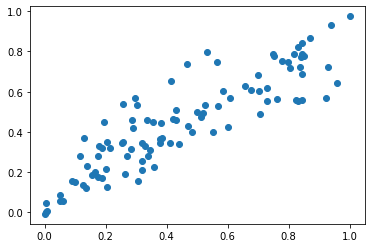

In [96]:
plt.scatter(y_test_1,y_test_pred)

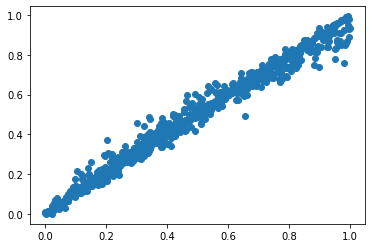

In [97]:
plt.scatter(y_train,y_train_pred)

In [98]:
rmse_train = np.sqrt(mean_squared_error(y_train,y_train_pred))
r2_train = r2_score(y_train, y_train_pred)
# evaluating the model on test dataset
rmse_test = np.sqrt(mean_squared_error(y_test_1, y_test_pred))
r2_test = r2_score(y_test_1, y_test_pred)

print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))

print("\n")

print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

The model performance for the training set
-------------------------------------------
RMSE of training set is 0.039506277276415355
R2 score of training set is 0.9811066199946676


The model performance for the test set
-------------------------------------------
RMSE of test set is 0.12898630463364616
R2 score of test set is 0.7814132446421884
